# Pokemon
-------------------------------------------

## Purpose
---------------------------------------
* 포켓몬의 `attack` 예측

## Introduction
---------------------------------------


## Data
----------------------

> ### Input Variable
---------------------
**Feature Data(9)**
#### Category feature
* "#" - ID for each pokemon(포켓몬의 아이디)
* `type 1`   
  * 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
   'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
   'Dragon', 'Dark', 'Steel', 'Flying' 

* `type 2` - 두 개의 속성을 가지는 경우 type2 에 추가된다     
  * 'Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
   'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
   'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'
   
* `Legendary`: Legendary(True False)
* `Generation` : Game Generation(세대)
  * (1,2,3,4,5,6)

#### Real value feature
* `Total`: sum of all stats that come after this, a general guide to how strong a pokemon is
* `HP` : hit points, or health, defines how much damage a pokemon can withstand before fainting
* `Attack` : the base modifier for normal attacks (eg. Scratch, Punch)
* `Defense` : the base damage resistance against normal attacks
* `SP Atk`: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* `SP Def`: the base damage resistance against special attacks
* `Speed`: determines which pokemon attacks first each round



In [1]:
df = pd.read_csv('Pokemon.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
df.drop('Name', axis=1, inplace=True)
df.drop('#', axis=1, inplace=True)
df.drop("Total", axis=1, inplace=True)

In [6]:
df.rename(index=str, columns={"Sp. Atk": "special_attack", "Sp. Def": "special_defense", "Type 1":"Type_1", "Type 2" : "Type_2"}, inplace=True)
df.tail()

,Type_1,Type_2,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
795,Rock,Fairy,50,100,150,100,150,50,6,True
796,Rock,Fairy,50,160,110,160,110,110,6,True
797,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Psychic,Dark,80,160,60,170,130,80,6,True
799,Fire,Water,80,110,120,130,90,70,6,True


# EDA 

## 1. Type_2 NaN 데이터 -> Type_1 의 데이터

In [7]:
df['Type_2'] = df['Type_2'].fillna(0)

for i in range(len(df)):
    if df['Type_2'].iloc[i] == 0:
        df['Type_2'].iloc[i] = df['Type_1'].iloc[i]

## 2. 컬럼 분류
- 카테고리 데이터와 실수 데이터를 분류

In [8]:
df["Legendary"] = df['Legendary'].astype("category")
df['Generation'] = df['Generation'].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 10 columns):
Type_1             800 non-null object
Type_2             800 non-null object
HP                 800 non-null int64
Attack             800 non-null int64
Defense            800 non-null int64
special_attack     800 non-null int64
special_defense    800 non-null int64
Speed              800 non-null int64
Generation         800 non-null category
Legendary          800 non-null category
dtypes: category(2), int64(6), object(2)
memory usage: 58.1+ KB


In [10]:
quantitative = [f for f in df.columns if df.dtypes[f] == 'int64']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object'] + ['Legendary', 'Generation']

In [11]:
quantitative.remove('Attack')
quantitative

['HP', 'Defense', 'special_attack', 'special_defense', 'Speed']

In [12]:
qualitative

['Type_1', 'Type_2', 'Legendary', 'Generation']

## 3. X feature Data frame 생성
- dfX 라는 독립변수로 이루어진 데이터 프래임 생성

In [13]:
dfX = df[quantitative + qualitative]
dfX.tail()

,HP,Defense,special_attack,special_defense,Speed,Type_1,Type_2,Legendary,Generation
795,50,150,100,150,50,Rock,Fairy,True,6
796,50,110,160,110,110,Rock,Fairy,True,6
797,80,60,150,130,70,Psychic,Ghost,True,6
798,80,60,170,130,80,Psychic,Dark,True,6
799,80,120,130,90,70,Fire,Water,True,6


In [14]:
df.tail()

,Type_1,Type_2,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
795,Rock,Fairy,50,100,150,100,150,50,6,True
796,Rock,Fairy,50,160,110,160,110,110,6,True
797,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Psychic,Dark,80,160,60,170,130,80,6,True
799,Fire,Water,80,110,120,130,90,70,6,True


## 4. 실수형 데이터 간의 pairplot / Correlation 

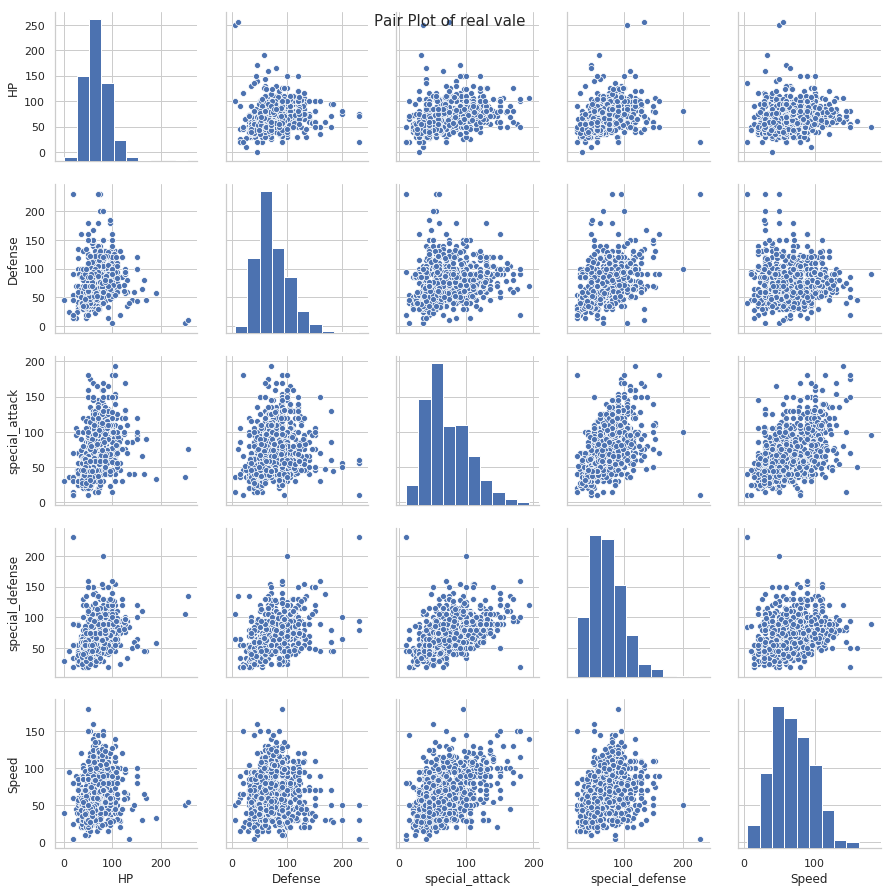

In [15]:
sns.pairplot(df[quantitative])
plt.suptitle('Pair Plot of real vale', size = 15);
plt.show()

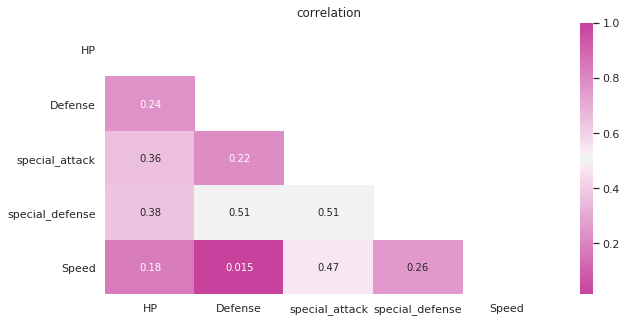

In [17]:
plt.figure(figsize=(10, 5))
cor_mat = df[quantitative].corr()
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(330, 330, as_cmap=True)
sns.heatmap(data=cor_mat, mask=mask, annot=True, cmap=cmap)
plt.title('correlation')
plt.show()

##  Special_attack 과 Attack과의 관계

special_attack으로 `0.157` 정도 설명된다

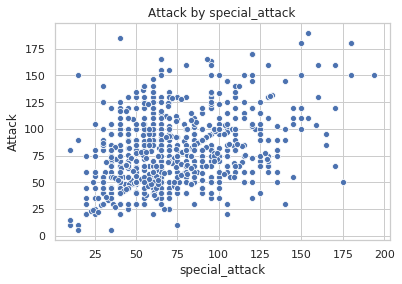

In [18]:
sns.scatterplot(df['special_attack'], df["Attack"])
plt.title("Attack by special_attack")
plt.show()

In [19]:
model = sm.OLS.from_formula("Attack ~ scale(special_attack)", data=df)
result_special_attack = model.fit()
print(result_special_attack.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           1.71e-31
Time:                        18:09:58   Log-Likelihood:                -3850.2
No. Observations:                 800   AIC:                             7704.
Df Residuals:                     798   BIC:                             7714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                79.00

##  Special_defense 와 Attack과의 관계

special_defense 로 `0.070` 정도 설명된다

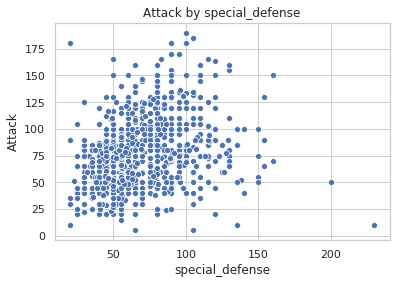

In [20]:
sns.scatterplot(df['special_defense'], df["Attack"])
plt.title("Attack by special_defense")
plt.show()

In [21]:
model = sm.OLS.from_formula("Attack ~ scale(special_defense)", data=df)
result_special_attack = model.fit()
print(result_special_attack.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     59.78
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.20e-14
Time:                        18:10:03   Log-Likelihood:                -3889.7
No. Observations:                 800   AIC:                             7783.
Df Residuals:                     798   BIC:                             7793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 79

##  HP 와 Attack과의 관계

HP 로 `0.178` 정도 설명된다

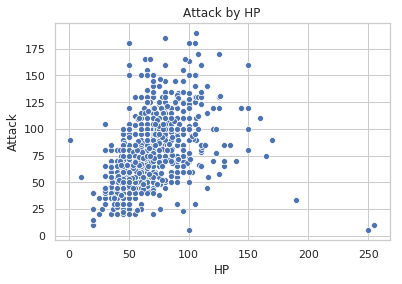

In [22]:
sns.scatterplot(df['HP'], df["Attack"])
plt.title("Attack by HP")
plt.show()

In [23]:
model = sm.OLS.from_formula("Attack ~ scale(HP)", data=df)
result_special_attack = model.fit()
print(result_special_attack.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           5.89e-36
Time:                        18:10:08   Log-Likelihood:                -3840.0
No. Observations:                 800   AIC:                             7684.
Df Residuals:                     798   BIC:                             7693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0013      1.041     75.904      0.0

##  defense 와 Attack과의 관계

defense 로 `0.192` 정도 설명된다

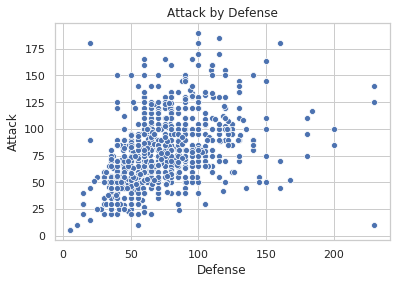

In [24]:
sns.scatterplot(df['Defense'], df["Attack"])
plt.title("Attack by Defense")
plt.show()

In [25]:
model = sm.OLS.from_formula("Attack ~ scale(Defense)", data=df)
result_special_attack = model.fit()
print(result_special_attack.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           5.86e-39
Time:                        18:10:13   Log-Likelihood:                -3833.1
No. Observations:                 800   AIC:                             7670.
Df Residuals:                     798   BIC:                             7680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         79.0013      1.032     76.

##  speed 와 Attack과의 관계

speed 로 `0.145` 정도 설명된다

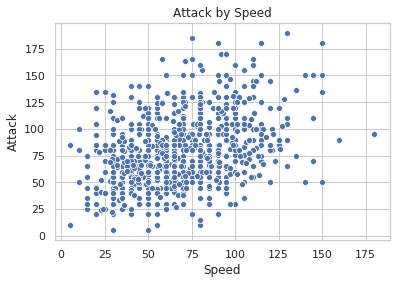

In [26]:
sns.scatterplot(df['Speed'], df["Attack"])
plt.title("Attack by Speed")
plt.show()

In [27]:
model = sm.OLS.from_formula("Attack ~ scale(Speed)", data=df)
result_special_speed = model.fit()
print(result_special_speed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           4.48e-29
Time:                        18:10:41   Log-Likelihood:                -3855.8
No. Observations:                 800   AIC:                             7716.
Df Residuals:                     798   BIC:                             7725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       79.0013      1.062     74.421   

## 5. 범주형 데이터 간의 Correlation 


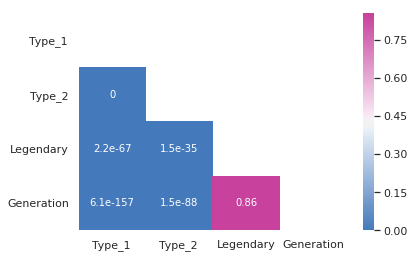

In [28]:
def chi2_test(df = df, cat1='hour', cat2='holiday', values='Attack'):
        """
        params: dataframe, 범주형 컬럼명1, 범주형 컬럼명2, 값
        귀무가설: 범주1, 2는 독립이다.
        return: g 카이제곱값, p p-value
        """
        chi2_df = df.pivot_table(values=values, index=cat1, columns=cat2, aggfunc=np.mean, fill_value=0)
        g, p, dof, expected = sp.stats.chi2_contingency(chi2_df)    
        return p


def cate_cor(*cols):
    col = list(cols)
    df = pd.DataFrame(columns=col, index=col)
    ls = []
    for i in col:
        for j in col:
            if i == j:
                ls.append(0)
            else:
                ls.append(chi2_test(cat1 = i, cat2 = j))
        df[i] = ls
        ls = []

    return df

category = cate_cor('Type_1', 'Type_2', 'Legendary', 'Generation')

mask = np.zeros_like(category, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 330, as_cmap=True)
sns.heatmap(data=category, mask=mask, annot=True, cmap=cmap)
plt.show()

## 카테고리 visualization 

### Type_1 의 갯수
- water가 제일 많다
- flying이 제일 적다

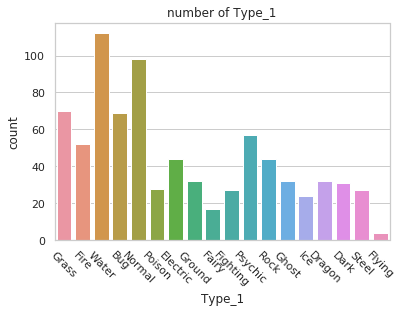

In [29]:
sns.countplot(x=df['Type_1'])
plt.xticks(rotation=-45)
plt.title("number of Type_1")
plt.show()

### Type_2 의 갯수
- Flying이 제일 많다
- Bug가 제일 적다

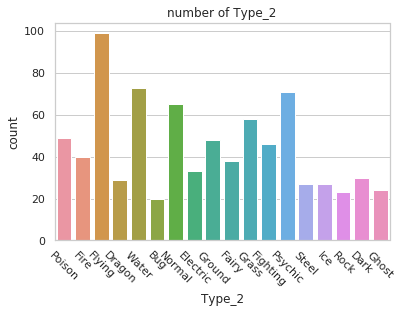

In [30]:
sns.countplot(x=df['Type_2'])
plt.xticks(rotation=-45)
plt.title("number of Type_2")
plt.show()

### legend 의 갯수
- legend 가 아닌 것이 7배 가량 많다

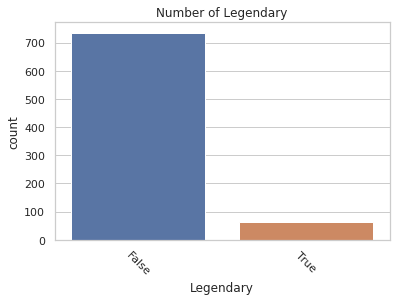

In [31]:
sns.countplot(x=df['Legendary'])
plt.xticks(rotation=-45)
plt.title('Number of Legendary')
plt.show()

### Generation 의 갯수
- Generation 1,3,5 가 제일 많다
- Generation 6이 제일 적다

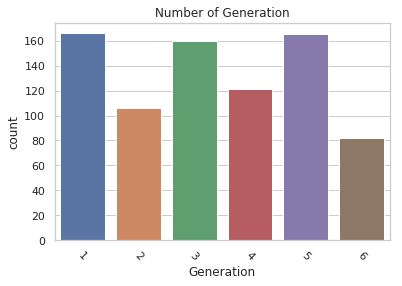

In [32]:
sns.countplot(x=df['Generation'])
plt.xticks(rotation=-45)
plt.title('Number of Generation')
plt.show()

### attack 과 legend와의 관계 시각화

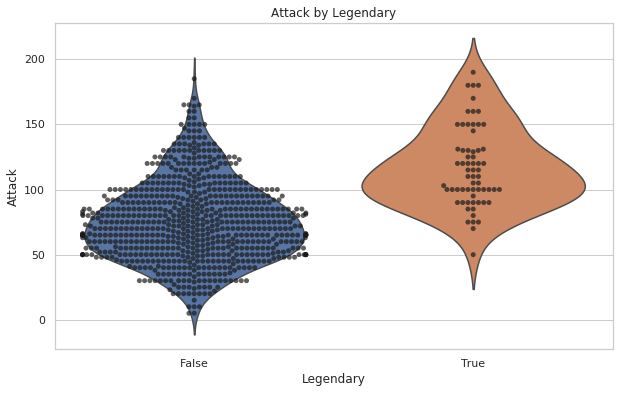

In [33]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Legendary',
               y='Attack', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='Legendary', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Legendary')
plt.show()

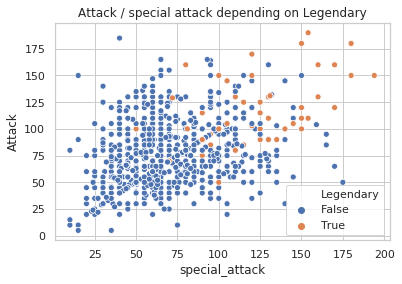

In [34]:
sns.scatterplot(data=df,x='special_attack',y='Attack',hue='Legendary')
plt.title('Attack / special attack depending on Legendary')
plt.show()

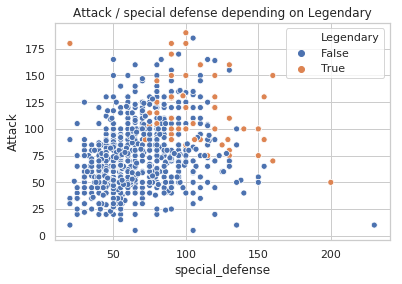

In [35]:
sns.scatterplot(data=df,x='special_defense',y='Attack',hue='Legendary')
plt.title('Attack / special defense depending on Legendary')
plt.show()

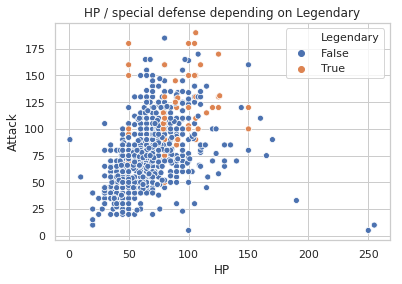

In [36]:
sns.scatterplot(data=df,x='HP',y='Attack',hue='Legendary')
plt.title('HP / special defense depending on Legendary')
plt.show()

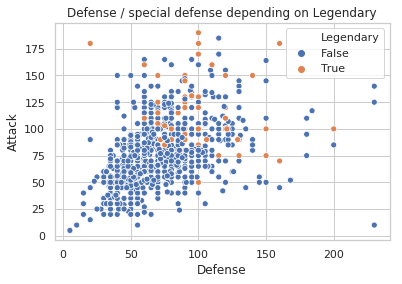

In [37]:
sns.scatterplot(data=df,x='Defense',y='Attack',hue='Legendary')
plt.title('Defense / special defense depending on Legendary')
plt.show()

### attack 과 Type_1과의 관계 시각화

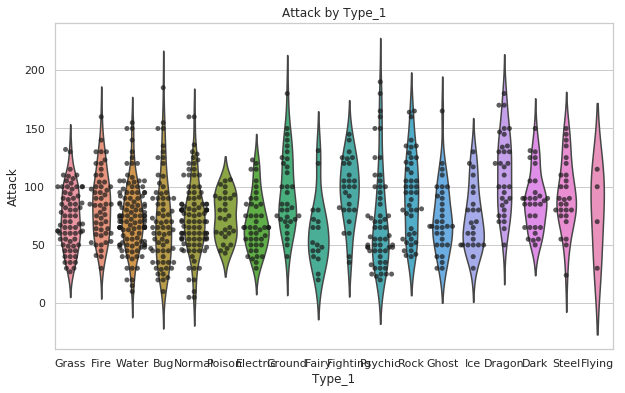

In [38]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type_1',
               y='Attack', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='Type_1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type_1')
plt.show()

### attack 과 Type_2과의 관계 시각화

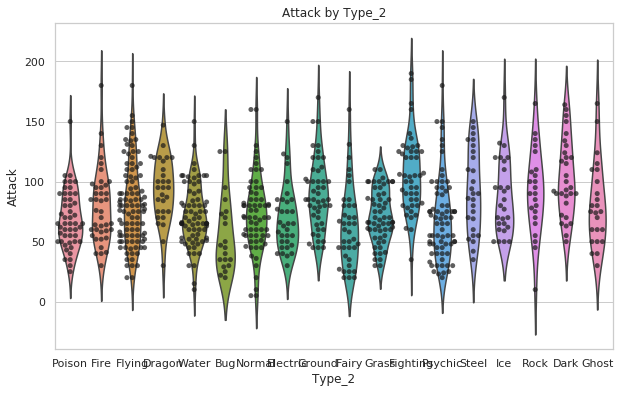

In [39]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type_2',
               y='Attack', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='Type_2', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type_2')
plt.show()

### attack 과 Generation과의 관계 시각화

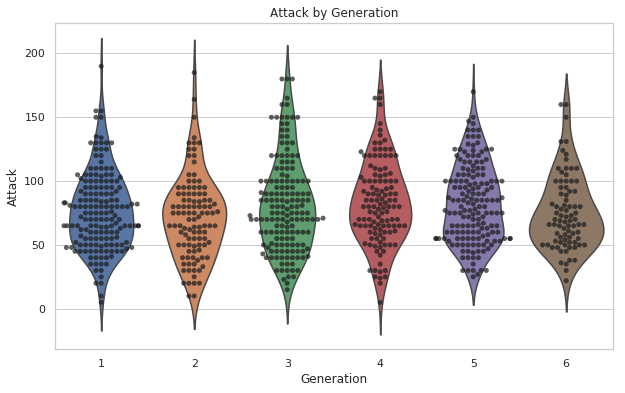

In [40]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Generation',
               y='Attack', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='Generation', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Generation')
plt.show()

maean 76.63855421686748
median 75.0


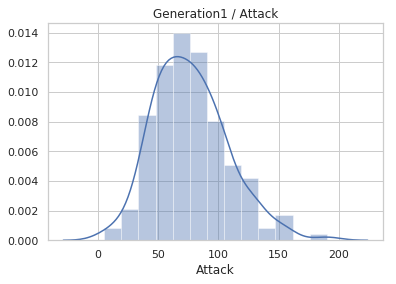

In [41]:
df_generation_1 = df[df["Generation"] == 1]
print('maean',df_generation_1['Attack'].mean())
print('median',df_generation_1['Attack'].median())
plt.title('Generation1 / Attack')
sns.distplot(df_generation_1['Attack'])
plt.show()

maean 72.02830188679245
median 73.5


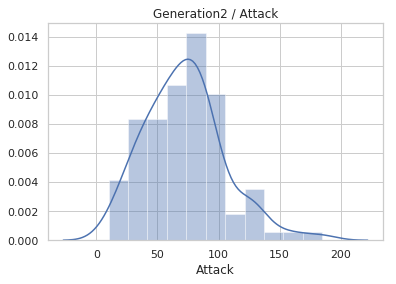

In [42]:
df_generation_2 = df[df["Generation"] == 2]
print('maean',df_generation_2['Attack'].mean())
print('median',df_generation_2['Attack'].median())
plt.title('Generation2 / Attack')
sns.distplot(df_generation_2['Attack'])
plt.show()

maean 81.625
median 75.0


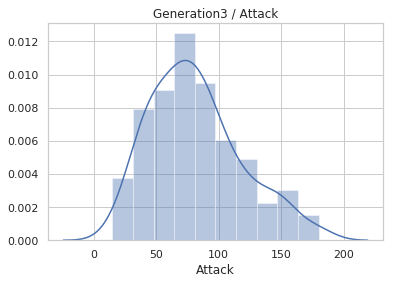

In [43]:
df_generation_3 = df[df["Generation"] == 3]
print('maean',df_generation_3['Attack'].mean())
print('median',df_generation_3['Attack'].median())
plt.title('Generation3 / Attack')
sns.distplot(df_generation_3['Attack'])
plt.show()

maean 82.86776859504133
median 80.0


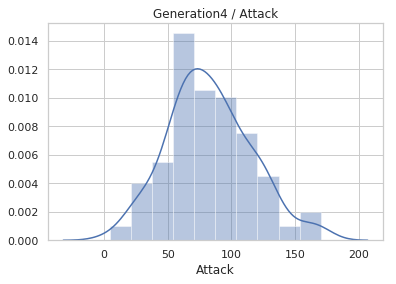

In [44]:
df_generation_4 = df[df["Generation"] == 4]
print('maean',df_generation_4['Attack'].mean())
print('median',df_generation_4['Attack'].median())
plt.title('Generation4 / Attack')
sns.distplot(df_generation_4['Attack'])
plt.show()

maean 82.06666666666666
median 80.0


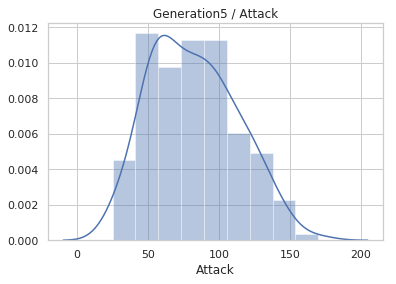

In [45]:
df_generation_5 = df[df["Generation"] == 5]
print('maean',df_generation_5['Attack'].mean())
print('median',df_generation_5['Attack'].median())
plt.title('Generation5 / Attack')
sns.distplot(df_generation_5['Attack'])
plt.show()

maean 75.8048780487805
median 69.5


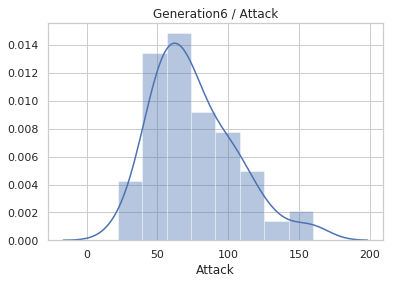

In [46]:
df_generation_6 = df[df["Generation"] == 6]
print('maean',df_generation_6['Attack'].mean())
print('median',df_generation_6['Attack'].median())
plt.title('Generation6 / Attack')
sns.distplot(df_generation_6['Attack'])
plt.show()

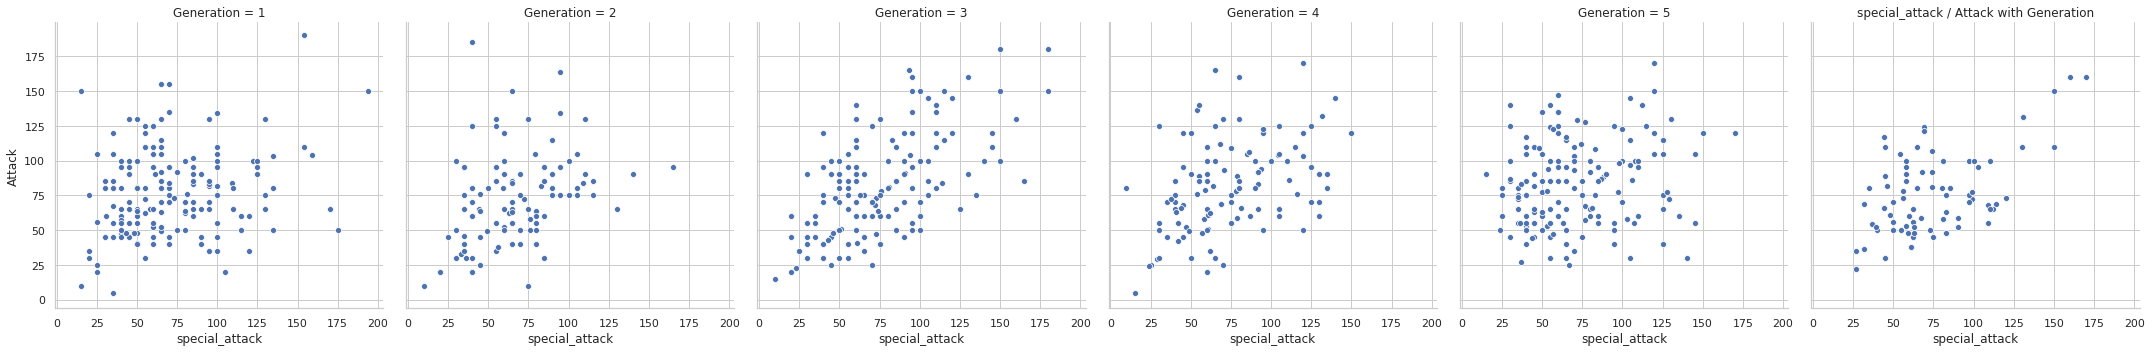

In [47]:
sns.relplot(x='special_attack', y='Attack', col='Generation', data=df)
plt.title('special_attack / Attack with Generation')
plt.show()

# Attack 분포 

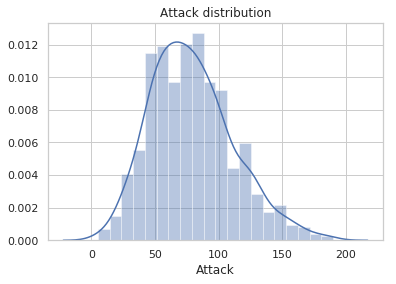

In [48]:
sns.distplot(df['Attack'])
plt.title('Attack distribution')
plt.show()

In [49]:
sm.stats.omni_normtest(df['Attack'])

NormaltestResult(statistic=37.21893710192359, pvalue=8.279621758263617e-09)

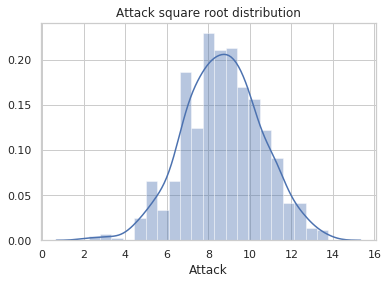

In [50]:
sns.distplot(np.sqrt(df['Attack']))
plt.title('Attack square root distribution')
plt.show()

In [51]:
sm.stats.omni_normtest(np.sqrt(df['Attack']))

NormaltestResult(statistic=1.3097478695811664, pvalue=0.5195075502872218)

# 순수 feature와 종속변수 확인(partial plot) 

In [52]:
model = sm.OLS.from_formula('Attack ~ C(Type_1) + C(Type_2) + C(Legendary) + C(Generation) + scale(HP) + scale(Defense) + scale(special_attack) + scale(special_defense) + scale(Speed)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     22.41
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          1.25e-109
Time:                        18:12:23   Log-Likelihood:                -3579.0
No. Observations:                 800   AIC:                             7250.
Df Residuals:                     754   BIC:                             7466.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 72

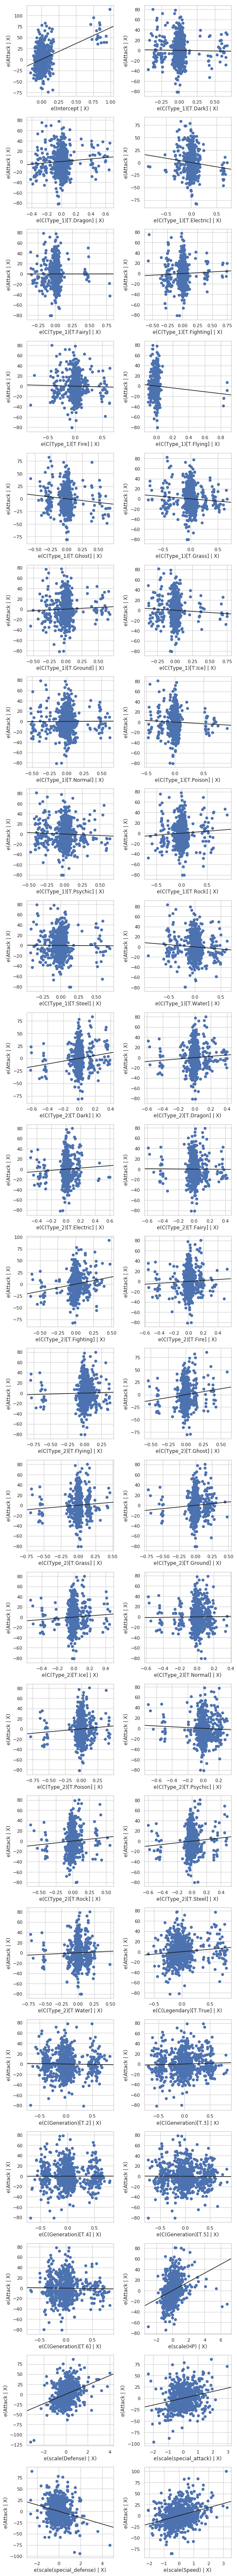

In [53]:
fig = plt.figure(figsize=(8, 90))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

# 이상 데이터 제거

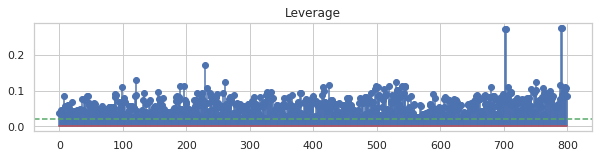

In [54]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("Leverage")
plt.show()

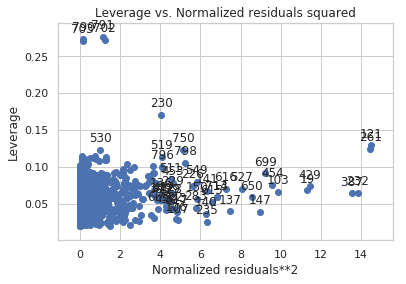

In [55]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [56]:
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

In [57]:
idx

array([ 19, 102, 103, 121, 136, 137, 140, 141, 147, 149, 150, 217, 226,
       228, 229, 230, 232, 261, 270, 283, 323, 329, 380, 387, 412, 414,
       416, 422, 428, 429, 453, 454, 456, 511, 512, 519, 526, 527, 528,
       531, 549, 615, 616, 624, 650, 698, 699, 702, 712, 713, 714, 750,
       751, 779, 791, 794, 796, 798])

In [58]:
df_new = df.copy()
len(df_new)

800

In [59]:
df_new.drop(df_new.index[[ 19, 102, 103, 121, 136, 137, 140, 141, 147, 149, 150, 217, 226,
       228, 229, 230, 232, 261, 270, 283, 323, 329, 380, 387, 412, 414,
       416, 422, 428, 429, 453, 454, 456, 511, 512, 519, 526, 527, 528,
       531, 549, 615, 616, 624, 650, 698, 699, 702, 712, 713, 714, 750,
       751, 779, 791, 794, 796, 798]], inplace=True)
df_new.reset_index(inplace=True)

In [60]:
df_new.tail()

,index,Type_1,Type_2,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
737,792,Fairy,Fairy,126,131,95,131,98,99,6,True
738,793,Dark,Flying,126,131,95,131,98,99,6,True
739,795,Rock,Fairy,50,100,150,100,150,50,6,True
740,797,Psychic,Ghost,80,110,60,150,130,70,6,True
741,799,Fire,Water,80,110,120,130,90,70,6,True


In [61]:
model = sm.OLS.from_formula('Attack ~ C(Type_1) + C(Type_2) + C(Legendary) + C(Generation) + scale(HP) + scale(Defense) + scale(special_attack) + scale(special_defense) + scale(Speed)', data=df_new)
result_new = model.fit()
print(result_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     35.78
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          1.50e-150
Time:                        18:13:02   Log-Likelihood:                -3133.9
No. Observations:                 742   AIC:                             6360.
Df Residuals:                     696   BIC:                             6572.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 67

# OLS

In [62]:
def make_OLS_form(dfX):
    # category column
    category = dfX.select_dtypes(include=['category','object']).columns
    category = list(map(lambda x: 'C('+x+')', category))
    category = ' + '.join(category)

    # non_category column
    non_category = dfX.select_dtypes(include=['float64','int64']).columns
    non_category = list(map(lambda x: 'scale(' + str(x) + ')', non_category))
    non_category = ' + '.join(non_category)

    X = 'Attack ~ '  + category + ' + ' + non_category
    return X

In [63]:
k = make_OLS_form(dfX)
k

'Attack ~ C(Type_1) + C(Type_2) + C(Legendary) + C(Generation) + scale(HP) + scale(Defense) + scale(special_attack) + scale(special_defense) + scale(Speed)'

### 교우작용 가장 적합한 조합 찾기

In [64]:
quantitative

['HP', 'Defense', 'special_attack', 'special_defense', 'Speed']

In [65]:
qualitative

['Type_1', 'Type_2', 'Legendary', 'Generation']

In [66]:
# HP 와 카테고리 변수들
formula1 = 'np.sqrt(Attack) ~ scale(HP)/C(Type_1)' # ok 0.351     ---------------
formula2 = 'np.sqrt(Attack) ~ scale(HP)/C(Type_2)' # ok 0.333
formula3 = 'np.sqrt(Attack) ~ scale(HP)/C(Legendary)' # ok 0.307
formula4 = 'np.sqrt(Attack) ~ scale(HP)/C(Generation)' # ok 0.299

# Defense 와 카테고리 변수들
formula1 = 'np.sqrt(Attack) ~ scale(Defense)/C(Legendary)' # ok 0.291
formula2 = 'np.sqrt(Attack) ~ scale(Defense)/C(Type_1)' # ok 0.337   ----------------
formula3 = 'np.sqrt(Attack) ~ scale(Defense)/C(Type_2)' # ok 0.323
formula4 = 'np.sqrt(Attack) ~ scale(Defense)/C(Generation)' # ok 0.285

# special_defense 와 카테고리 변수들
formula1 = 'np.sqrt(Attack) ~ scale(special_defense)/C(Legendary)' # ok 0.098
formula2 = 'np.sqrt(Attack) ~ scale(special_defense)/C(Type_1)' # ok 0.140
formula3 = 'np.sqrt(Attack) ~ scale(special_defense)/C(Type_2)' # ok 0.154
formula4 = 'np.sqrt(Attack) ~ scale(special_defense)/C(Generation)' # ok 0.100

# speed와 카테고리 변수들
formula1 = 'np.sqrt(Attack) ~ scale(Speed)/C(Legendary)' # ok 0.167
formula2 = 'np.sqrt(Attack) ~ scale(Speed)/C(Type_1)' # ok 0.191
formula3 = 'np.sqrt(Attack) ~ scale(Speed)/C(Type_2)' # ok 0.209
formula4 = 'np.sqrt(Attack) ~ scale(Speed)/C(Generation)' # ok 0.151

# special_attack과 카테고리 변수들
formula = 'np.sqrt(Attack) ~ scale(special_attack)/C(Legendary)' # ok 0.195
formula = 'np.sqrt(Attack) ~ scale(special_attack)/C(Type_1)' # ok 0.230 --------------------
formula3 = 'np.sqrt(Attack) ~ scale(special_attack)/C(Type_2)' # ok 0.229
formula4 = 'np.sqrt(Attack) ~ scale(special_attack)/C(Generation)' # ok 0.204


In [67]:
formula = 'np.sqrt(Attack) ~ C(Type_1) +C(Type_2) + C(Legendary) + scale(special_attack) \
+ scale(HP)/C(Type_1) + scale(Defense)/C(Type_1) + scale(special_defense) + scale(Speed)'

In [68]:
model = sm.OLS.from_formula(formula, data=df_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        np.sqrt(Attack)   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     22.45
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          4.00e-136
Time:                        18:13:13   Log-Likelihood:                -1006.1
No. Observations:                 742   AIC:                             2160.
Df Residuals:                     668   BIC:                             2501.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# 회귀분석 결과 진단

> ### 1) 잔차의 정규성 확인

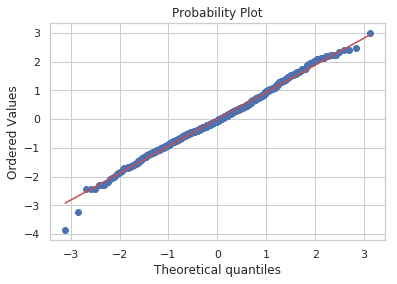

In [69]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [70]:
test = sm.stats.omni_normtest(result.resid)
print("statistics: ", test.statistic, "p-value: ", test.pvalue)

statistics:  4.2368482800817775 p-value:  0.12022093066632282


> ### 2) 등분산성(잔차 vs 예측치)

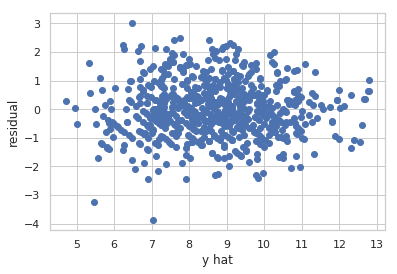

In [71]:
plt.scatter(x=result.fittedvalues, y=result.resid)
plt.xlabel("y hat")
plt.ylabel("residual")
plt.show()

> ### 3) 적합성 여부(실제 값 vs 예측치)

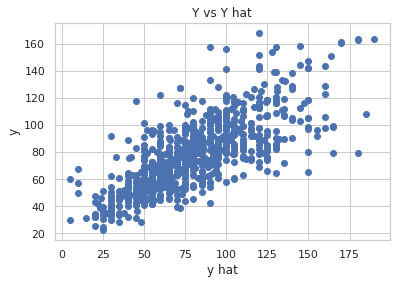

In [72]:
plt.scatter(x=df['Attack'], y=result.predict(df)**2)
plt.xlabel('y hat')
plt.ylabel('y')
plt.title('Y vs Y hat')
plt.show()



> ### 4) k 폴드 교차검증(overfitting 확인)

In [73]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]

    model = sm.OLS.from_formula(formula, data=df_new)
    result = model.fit()

    pred = result.predict(df_test)
    rss = ((df_test['Attack'] - pred**2) ** 2).sum()
    tss = ((df_test['Attack'] - df_test['Attack'].mean())** 2).sum()
    rsquared = 1 - rss / tss

    scores[i] = rsquared
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared))

train R2 = 0.71040415, test R2 = 0.51422554
train R2 = 0.71040415, test R2 = 0.62824822
train R2 = 0.71040415, test R2 = 0.58871071
train R2 = 0.71040415, test R2 = 0.57364491
train R2 = 0.71040415, test R2 = 0.52593165
